In [3]:
import pickle
import xarray as xr
import numpy as np
import os
import shutil
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pygrib
import matplotlib.pyplot as plt

(1128, 128, 256)
(1128, 128, 256)
(1128, 128, 256)


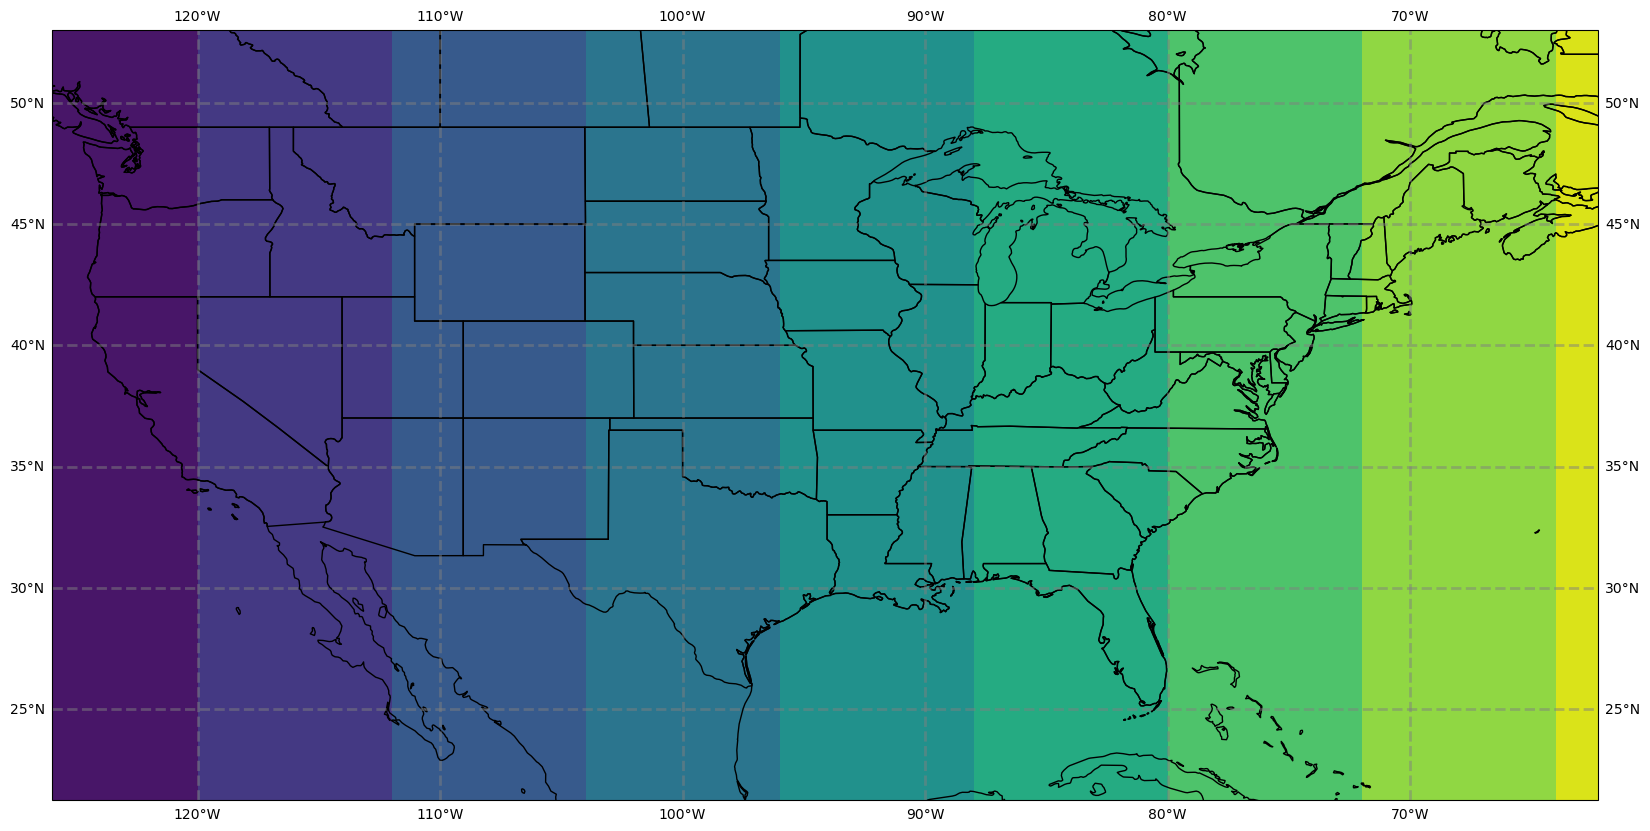

In [5]:
north_idx=148
south_idx=276
west_idx=936
east_idx=1192

gfs_dir = '/ourdisk/hpc/ai2es/bmac87/GFS/00Z/f000/'

files = os.listdir(gfs_dir)
file = files[0]

grbs = pygrib.open(gfs_dir+file)
valid_time = grbs[1].validDate
lat,lon = grbs[1].latlons()

gfs_orography = grbs.select(name='Orography',level=0)[0].values




terrain = gfs_orography[north_idx:south_idx,west_idx:east_idx]
bc_lat_2d = lat[north_idx:south_idx,west_idx:east_idx]
bc_lon_2d = lon[north_idx:south_idx,west_idx:east_idx]

for i in range(1127):
    if i==0:
        dstack_30_lat = np.dstack([bc_lat_2d,bc_lat_2d])
        dstack_30_lon = np.dstack([bc_lon_2d,bc_lon_2d])
        dstack_30_terrain = np.dstack([terrain,terrain])
    else:
        dstack_30_lon = np.dstack([dstack_30_lon,bc_lon_2d])
        dstack_30_lat = np.dstack([dstack_30_lat,bc_lat_2d])
        dstack_30_terrain = np.dstack([dstack_30_terrain,terrain])

dstack_30_terrain = np.moveaxis(dstack_30_terrain,-1,0)
dstack_30_lat = np.moveaxis(dstack_30_lat,-1,0)
dstack_30_lon = np.moveaxis(dstack_30_lon,-1,0)
print(dstack_30_terrain.shape)
print(dstack_30_lat.shape)
print(dstack_30_lon.shape)
static_dict = {'lat':dstack_30_lat, 'lon':dstack_30_lon,'terrain':dstack_30_terrain}
pickle.dump(static_dict,open('static_inputs.pkl','wb'))


fig = plt.figure(figsize=(20,10))
#plot the temperature
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.contourf(bc_lon_2d,bc_lat_2d,np.squeeze(dstack_30_lon[200,:,:]),transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.STATES,edgecolor="black")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

(1129, 128, 256)
(1129, 128, 256)
(1129, 128, 256)


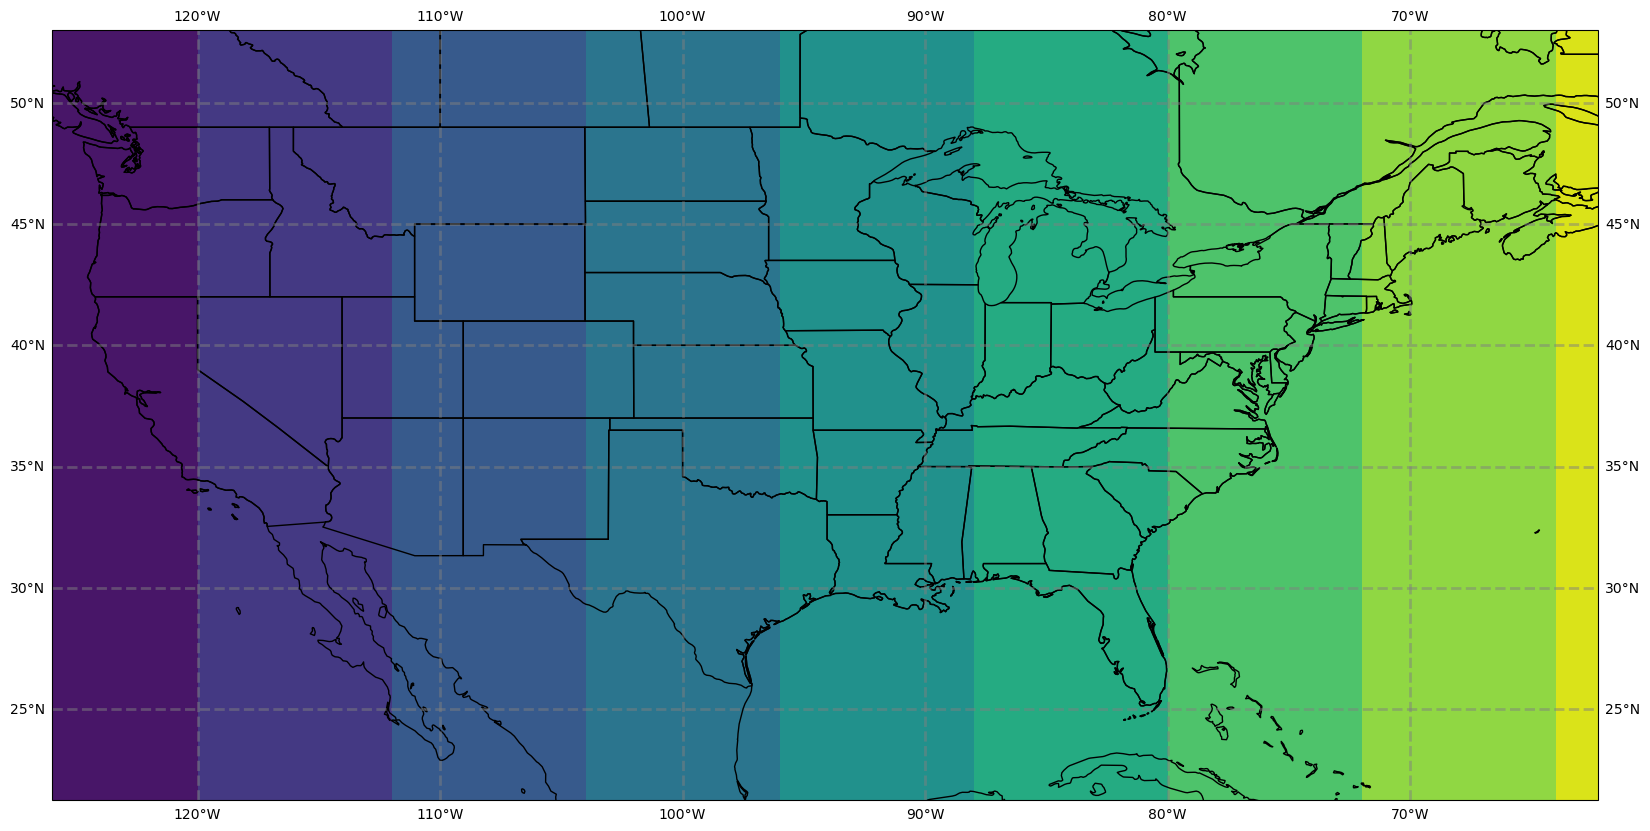

history
test_x
test_y
test_prediction
fname_base
loss
binary_crossentropy
val_loss
val_binary_crossentropy
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ...

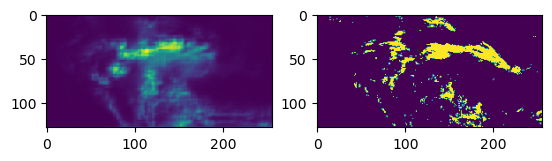

In [13]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

res_dir = '/scratch/bmac87/results/exp1_deep2/pickles/'
files = os.listdir(res_dir)

file = files[0]

results = pickle.load(open(res_dir+file,'rb'))

for key in results:
    print(key)

for key in results['history']:
    print(key)
    
test_pred = np.squeeze(results['test_prediction'])
test_y = results['test_y']['binary_ltg']
print(test_y)
print(test_pred.shape)

one_sample_pred = np.squeeze(test_pred[2,:,:])
one_sample_real = np.squeeze(test_y[2])

plt.subplot(121)
plt.imshow(one_sample_pred)
plt.subplot(122)
plt.imshow(one_sample_real)





